**1**

Бизнес-задачи: Предсказывание наличия или отсутствия сердечно-сосудистого заболевания у пациента на основе медицинских данных.

Задача машинного обучения: Бинарная классификация.

Ссылка на дата-сет:  https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data

**2**

**Первичный анализ данных**

Датасет о заболеваниях сердца содержит информацию, объединенную из пяти популярных наборов данных о заболеваниях сердца, которые ранее были доступны независимо. В нем содержатся 1190 экземпляров с 11 характеристиками:

1. Возраст пациента в годах (Age).
2. Пол пациента (0 = женский, 1 = мужской) (Sex).
3. Классификация типа боли в груди по категориям (Chest Pain Type).
4. Артериальное давление в состоянии покоя (Resting Blood Pressure).
4. Уровень холестерина в мг/дл (Cholesterol).
5. Уровень сахара в крови натощак (если превышает 120 мг/дл, то = 1, иначе 0) (Fasting Blood Sugar).
6. Результаты электрокардиографии в состоянии покоя, классифицированные по категориям (Resting Electrocardiographic Results).
7. Максимальная частота сердечных сокращений (Maximum Heart Rate).
8. Стенокардия, вызванная физической нагрузкой (1 = да, 0 = нет) (Exercise Induced Angina).
9. Числовое значение, отражающее ST депрессию на ЭКГ (Oldpeak).
10. Классификация наклона ST-сегмента в состоянии покоя (ST Slope).
11. Целевая переменная, обозначающая наличие или отсутствие сердечно-сосудистого заболевания (1 = есть, 0 = отсутствует) (Target).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")
df.head(3)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [ ]:
y = df['target']
X = df.drop(['target'], axis=1)

In [ ]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
print("Характеристики атрибутов:")
df.info()

Характеристики атрибутов:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
print("Отсутствующие значения:")
print(df.isnull().sum())

Отсутствующие значения:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Все значения числовые и ненулевые.

**Предобработка данных и разведывательный анализ данных**

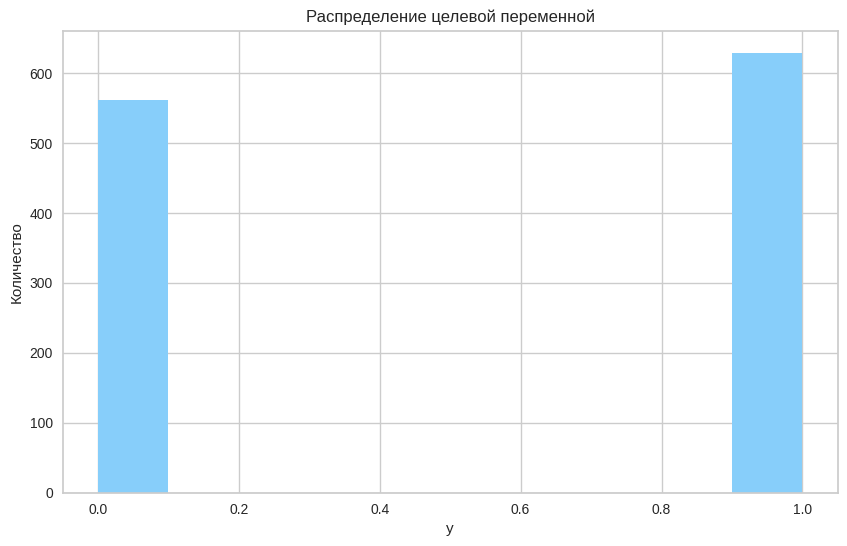

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Распределение целевой переменной')
plt.hist(y, color='lightskyblue')
plt.xlabel('y')
plt.ylabel('Количество')
plt.show()

Целевой столбец достаточно хорошо сбалансирован.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>, <Axes: >]], dtype=object)

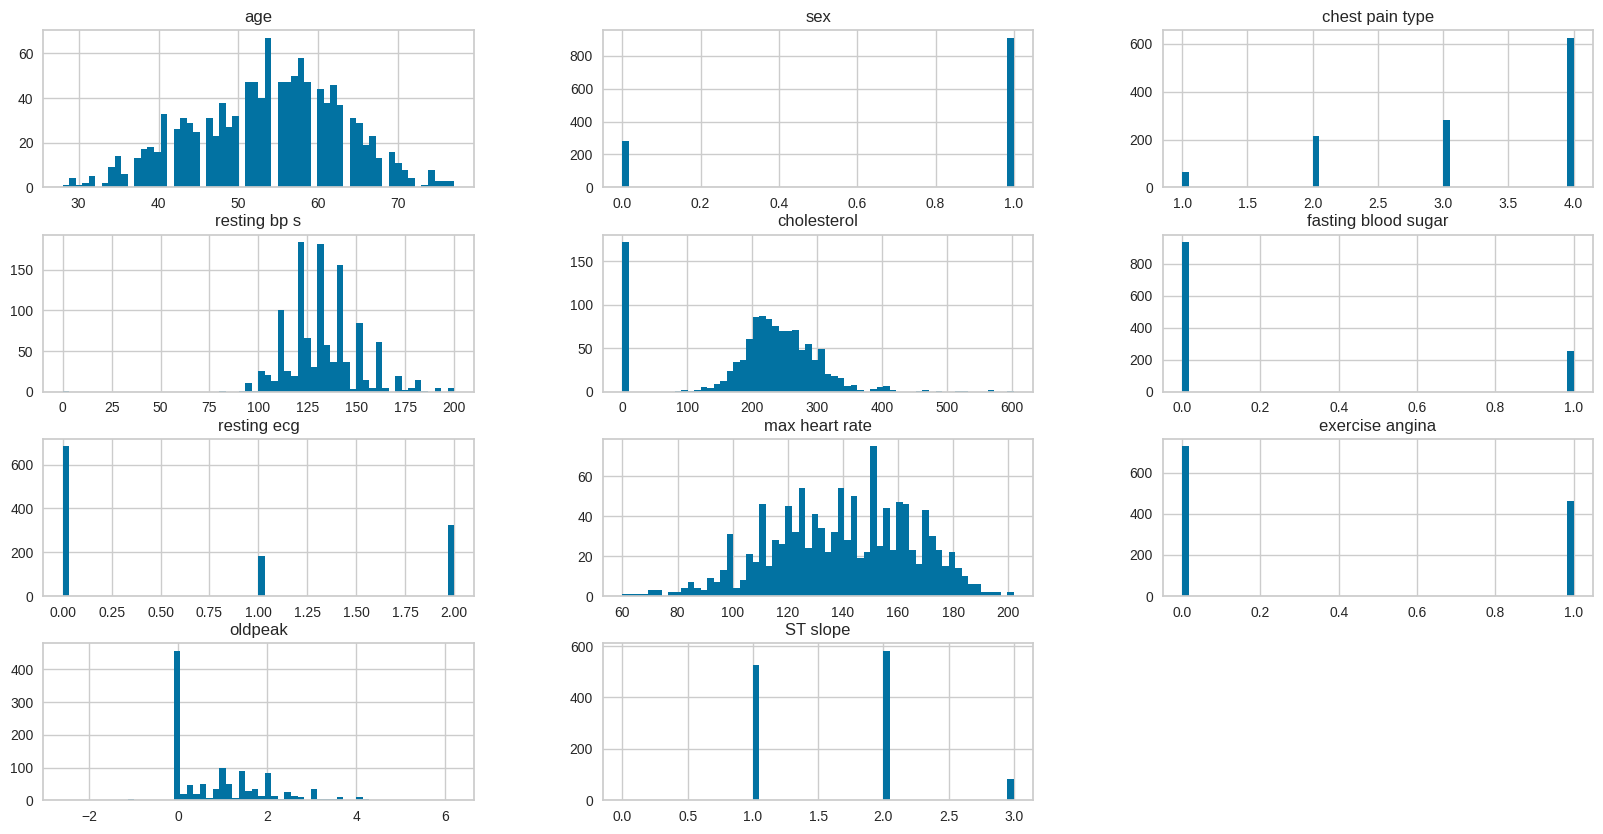

In [ ]:
X.hist(figsize=(20, 10), bins = 60)

Присутствуют некоторые аномалии в признаках cholesterol и resting bp s.

{'whiskers': [<matplotlib.lines.Line2D at 0x78822d0e0f70>,
 'caps': [<matplotlib.lines.Line2D at 0x78822d0e14b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78822d0e0cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x78822d0e19f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78822d0e1c90>],
 'means': []}

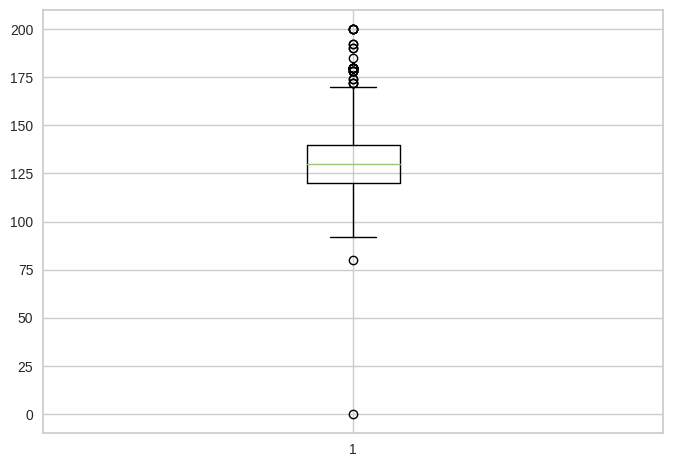

In [ ]:
plt.boxplot(df['resting bp s'])

Артериальное давление в состоянии покоя не может быть равным 0, поэтому узнаем у каких наблюдений оно такое.

In [ ]:
df[df['resting bp s'] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,0,0,0,155,0,1.5,2,1


In [ ]:
# у этого же человека cholesterol = 0, поэтому удалим строку
df.drop(index=450, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x78822cf51930>,
 'caps': [<matplotlib.lines.Line2D at 0x78822cf51e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x78822d0e1ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x78822cf523b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78822cf52650>],
 'means': []}

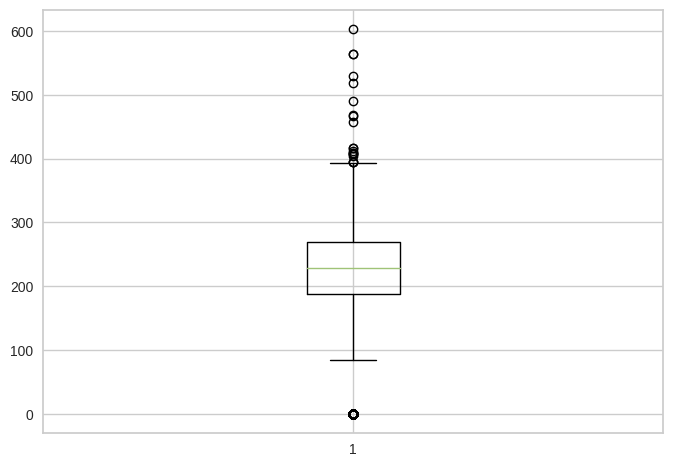

In [ ]:
plt.boxplot(df['cholesterol'])

Уровень холестерина не может быть равен нулю, однако столбец содержит большое количество нулей.

In [ ]:
# Процент строк, где уровень холестерина = 0
sum(df['cholesterol'] == 0) / len(df) * 100

14.38183347350715

In [ ]:
# У 88 % этих людей было сердечно-сосудистое заболевание
df[df['cholesterol'] == 0]['target'].value_counts(normalize=True)

target
1    0.883041
0    0.116959
Name: proportion, dtype: float64

In [ ]:
# Вычисляем среднее значение холестерина для группы данных, где холестерин не равен нулю, но человек болен
mean_cholesterol = df[(df['cholesterol'] != 0) & (df['target'] == 1)]['cholesterol'].mean()

# Заменяем нулевые значения холестерина на среднее значение
df.loc[(df['cholesterol'] == 0) & (df['target'] == 1), 'cholesterol'] = mean_cholesterol

In [ ]:
# Вычисляем среднее значение холестерина для группы данных, где холестерин не равен нулю, но человек не болен
mean_cholesterol = df[(df['cholesterol'] != 0) & (df['target'] == 0)]['cholesterol'].mean()

# Заменяем нулевые значения холестерина на среднее значение
df.loc[(df['cholesterol'] == 0) & (df['target'] == 0), 'cholesterol'] = mean_cholesterol

<Axes: xlabel='cholesterol', ylabel='Count'>

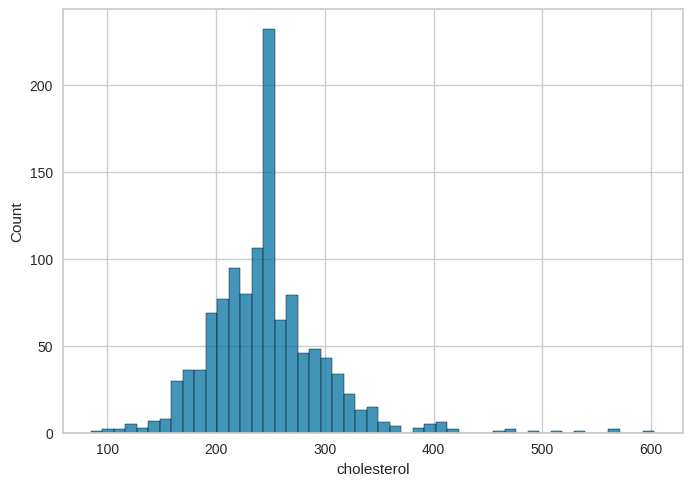

In [ ]:
sns.histplot(df.cholesterol)

Факторы в целом распределены хорошо, присутствуют некоторые аномально высокие значения, однако не будем их менять, так как они могут представлять редкие или уникальные случаи.

Значимость атрибутов для предсказания целевой переменной:


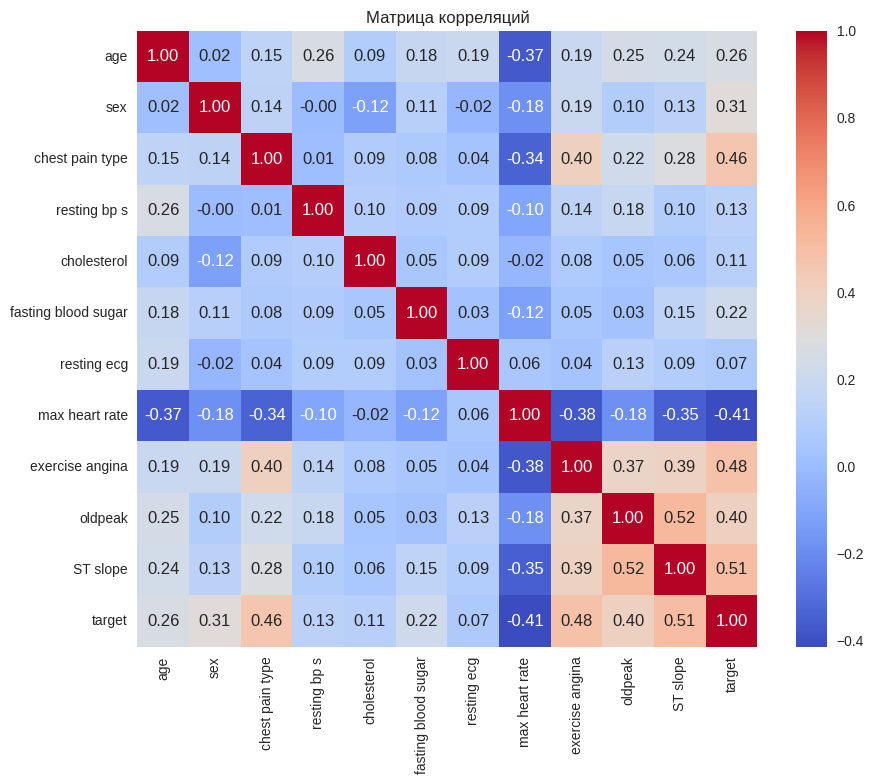

In [ ]:
print("Значимость атрибутов для предсказания целевой переменной:")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

Сильной корреляционной связи между факторами нет (мультиколлинеарность отсутствует). С целевой переменной умеренная положительная корреляция у признаков 'Chest Pain Type', 'Exercise Induced Angina', 'Oldpeak', 'ST Slope', а умеренная отрицательная у 'max heart rate'.



**Создание признаков (Feature Engineering)**

Набор данных уже содержит основные медицинские показатели, которые являются ключевыми для прогнозирования сердечно-сосудистых заболеваний. Дополнительное создание признаков не требуется, так как имеющиеся признаки уже предоставляют всю необходимую информацию для построения точной модели.

**Отбор признаков (Feature selection)**

Все признаки были предварительно отобраны на основе медицинских исследований и доказали свою значимость для диагностики сердечно-сосудистых заболеваний. Поэтому используются все доступные признаки для обеспечения наилучшей точности модели.

**Подготовка данных**

In [ ]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3** (Метрики для оценки моделей)

Для оценки моделей машинного обучения в задаче прогнозирования сердечно-сосудистых заболеваний, целесообразно использовать комбинацию следующих метрик: Accuracy, Precision, Recall, F1-Score. Это позволит получить всестороннее представление о производительности модели и выбрать наилучшую модель.
1. Accuracy (Точность)
Интерпретация: Процент правильно классифицированных пациентов. Высокая точность указывает на общее хорошее качество модели, но может быть недостаточно информативной при несбалансированных классах.
2. Precision (Точность положительных предсказаний)
Интерпретация: Процент пациентов, которых модель правильно определила как больных, среди всех предсказанных больных. Высокая точность важна для уменьшения ложных тревог, чтобы не назначать ненужное лечение здоровым пациентам.
3. Recall (Полнота, чувствительность)
Интерпретация: Процент правильно идентифицированных больных пациентов среди всех реальных больных. Высокая полнота критически важна для обнаружения всех возможных случаев заболевания, минимизируя риск пропущенных диагнозов.
4. F1-Score
Интерпретация: Среднее гармоническое между Precision и Recall. Высокий F1-Score указывает на хороший баланс между точностью предсказаний и полнотой.

**4** (Построение моделей машинного обучения)

Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

Деревья решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

Метод k-ближайших соседей (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Наивный байесовский классификатор (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

Составим таблицу, которая помогает оценить производительность каждой модели и сравнить метрики между собой.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Метод опорных векторов': model_svm,
    'Деревья решений': model_dt,
    'Метод k-ближайших соседей': model_knn,
    'Наивный байесовский классификатор': model_nb,
}

metrics_data = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics = {
        'Модель': name,
        'Accuracy': round(accuracy*100, 2),
        'Precision': round(precision*100, 2),
        'Recall': round(recall*100, 2),
        'F1-Score': round(f1*100, 2)
    }

    metrics_data.append(metrics)

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Модель,Accuracy,Precision,Recall,F1-Score
0,Метод опорных векторов,74.79,77.69,76.52,77.10
1,Деревья решений,85.29,91.45,81.06,85.94
2,Метод k-ближайших соседей,80.25,82.95,81.06,81.99
3,Наивный байесовский классификатор,84.87,87.50,84.85,86.15


Исходя из представленных результатов, можно сравнить эффективность различных алгоритмов машинного обучения в задаче прогнозирования заболеваний сердца:
1. Деревья решений и наивный байесовский классификатор показали хорошие результаты с близкими значениями метрик.
2. Метод опорных векторов и метод k-ближайших соседей демонстрируют меньшую точность, метод опорных векторов хуже всего справился с задачей.

**5** (Диагностика лучшей модели)

Для дерева решений

Матрица ошибок (Confusion Matrix) - показывает, сколько примеров каждого класса было правильно и неправильно классифицировано.


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[ 96  10]
 [ 25 107]]


Кривые обучения

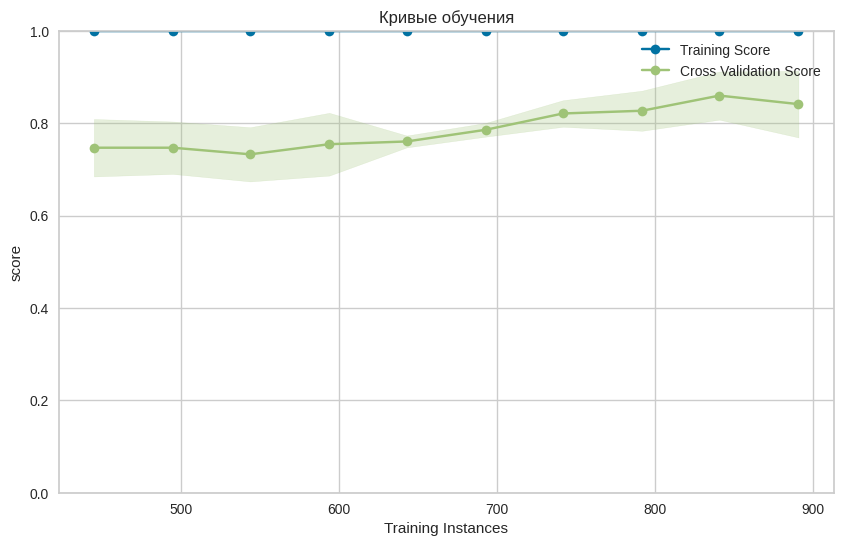

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

plt.figure(figsize=(10, 6))
plt.title('Кривые обучения')
visualizer = LearningCurve(
     DecisionTreeClassifier(), train_sizes=np.linspace(0.5, 1.0, 10), cv=StratifiedKFold(4)
).fit(X, y)
plt.ylim(0, 1)
plt.xlabel('Training Instances')
plt.ylabel('score')
plt.legend()
plt.show()

**6** (Подбор гиперпараметров)

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

# Определяем сетку гиперпараметров
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
model_dt = DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=2)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

accuracy: 0.8487394957983193
precision: 0.9210526315789473
recall: 0.7954545454545454
f1: 0.8536585365853658


Настройка гиперпараметров привела к изменению поведения модели, делая ее предсказания более точными, но менее полными.

**7**

Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_clf = RandomForestClassifier()
model_clf.fit(X_train, y_train)
y_pred = model_clf.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

accuracy: 0.9369747899159664
precision: 0.927007299270073
recall: 0.9621212121212122
f1: 0.9442379182156134


Автоматически определяем наилучшие гиперпараметры на основе заданных значений и кросс-валидации (с использованием метода Grid Search).

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры для Случайного леса:")
print(rf_grid_search.best_params_)

Лучшие гиперпараметры для Случайного леса:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
metrics = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'До подбора гиперпараметров': [93.7, 92.7,	96.21,	94.42],
    'После подбора гиперпараметров': [round(accuracy_score(y_test, y_pred)*100, 2), round(precision_score(y_test, y_pred)*100, 2), \
                                      round(recall_score(y_test, y_pred)*100, 2), round(f1_score(y_test, y_pred)*100, 2)]
}

metrics_df = pd.DataFrame(metrics)
print('Для Случайного леса:')
metrics_df

Для Случайного леса:


,Метрика,До подбора гиперпараметров,После подбора гиперпараметров
0,Accuracy,93.70,94.54
1,Precision,92.70,94.74
2,Recall,96.21,95.45
3,F1-score,94.42,95.09


Для модели Случайного леса наблюдается улучшение почти всех рассматриваемых метрик.


Для Случайного леса:


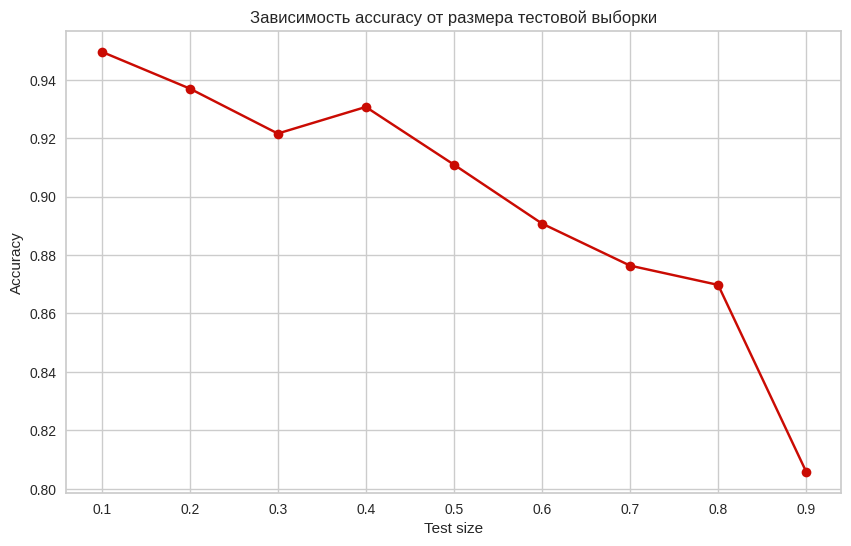

In [ ]:
def test_size_vs_accuracy(model, X, y, test_sizes=np.linspace(0.1, 0.9, 9), random_state=42):
    test_accuracies = []
    for size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        test_accuracies.append(test_accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(test_sizes, test_accuracies, 'o-', color="r")
    plt.xlabel("Test size")
    plt.ylabel("Accuracy")
    plt.title("Зависимость accuracy от размера тестовой выборки")
    plt.grid(True)
    plt.show()
print('Для Случайного леса:')
test_size_vs_accuracy(best_rf_model, X, y)

Следовательно, увеличение объема данных для тестирования модели снижает её производительность. Далее снизим размер тестовой выборки до 10% и создадим таблицы сравнения метрик до и после такого преобразования, так же засечем время обучения моделей.

In [ ]:
import time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
start_time = time.time()
best_rf_model2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_rf_model2.fit(X_train, y_train)
end_time = time.time()
print("Время обучения модели: {:.2f} секунд".format(end_time-start_time))
y_pred = best_rf_model2.predict(X_test)

metrics = {
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'До': [94.12, 93.38,	96.21,	94.78],
    'После': [round(accuracy_score(y_test, y_pred)*100, 2), round(precision_score(y_test, y_pred)*100, 2), \
                                      round(recall_score(y_test, y_pred)*100, 2), round(f1_score(y_test, y_pred)*100, 2)]
}

metrics_df = pd.DataFrame(metrics)
print('Для Случайного леса:')
metrics_df

Время обучения модели: 1.43 секунд
Для Случайного леса:


,Метрика,До,После
0,Accuracy,94.12,95.80
1,Precision,93.38,95.31
2,Recall,96.21,96.83
3,F1-score,94.78,96.06


Вероятно, уменьшение размера тестовой выборки позволило модели лучше узнать общие закономерности данных, что привело к увеличению точности предсказаний.




Оценка производительности моделей с использованием кросс-валидации

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(best_rf_model2, X, y, cv = 5, scoring = 'accuracy', n_jobs=-1)
print('Random Forest:')
print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Random Forest:
Кросс-валидация:  [0.89495798 0.8907563  0.94537815 0.92436975 0.96202532]
Среднее по кросс-валидации:  0.9234975002659291
Дисперсия по кросс-валидации:  0.027750338335756318


Среднее значение метрики кросс-валидации для Random Forest составляет 92.4%, что показывает, что модель Random Forest также обладает хорошей производительностью на кросс-валидации. Дисперсия метрики кросс-валидации также относительно невелика (0.03).

Важность признаков

In [ ]:
print('Для Random Forest')
importances = best_rf_model2.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 10 (0.176694)
2. feature 2 (0.140147)
3. feature 9 (0.129186)
4. feature 7 (0.127055)
5. feature 4 (0.109049)
6. feature 0 (0.085308)
7. feature 3 (0.082223)
8. feature 8 (0.063295)
9. feature 1 (0.042166)
10. feature 6 (0.026608)
11. feature 5 (0.018270)


Наиболее показательные параметры в моделе Random Forest: feature 10 (ST slope), feature 2 (Chest Pain Type), feature 9 (oldpeak), feature 7 (Maximum Heart Rate).

**Выводы**

В ходе работы были использованы следующие алгоритмы машинного обучения: SVM, Decision Tree, Random Forest, K-Nearest Neighbors, Naive Bayes. Для каждого алгоритма было оценено качество модели с помощью метрик accuracy, precision, recall, F1-score.

Лучшей моделью стал Random Forest. После настройки гиперпараметров наблюдается улучшение метрик. Уменьшение размера тестовой выборки до 10% так же привело к улучшению метрик. Это может свидетельствовать о том, что модель лучше узнала общие закономерности данных при таком размере выборки.


Важные факторы, влияющие на точность прогнозирования, включают тип боли в груди (Chest Pain Type), максимальную частоту сердечных сокращений (Maximum Heart Rate), а также параметры связанные с ЭКГ, такие как ST slope и ST depression (Oldpeak). Эти факторы могут играть ключевую роль в диагностике сердечно-сосудистых заболеваний.

Таким образом, для решения задачи прогнозирования заболеваний сердца рекомендуется использовать модель Random Forest из-за её хорошей производительности и относительно невысокого времени обучения. Эта модель показывает высокую точность предсказаний и хорошую производительность на кросс-валидации.